In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

In [2]:
# S: underlying stock price 
# K: Option strike price 
# r: risk free rate # D: dividend value 
# vol: Volatility 
# T: time to expiry in years

def d1_calc(S, K, r, vol, T, t):
    # Calculates d1 in the BSM equation
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

def BS_binary_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    return np.exp(-r*T)*norm.cdf(d2)

def BS_binary_put(S, K, r, vol, T, t):
    return BS_binary_call(S, K, r, vol, T,t) - S + np.exp(-r*(T-t))*K

##1st Order Greeks 
def delta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    
    if(otype == "call"):
        delta = np.exp(-(T-t))*norm.cdf(d1)
    elif(otype == "put"):
        delta = -np.exp(-(T-t))*norm.cdf(-d1)

    return delta

# Gamma for calls/puts the same
def vega(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    return S * norm.pdf(d1) * np.sqrt(T-t)

def rho(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        rho = K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d2)
    elif(otype == "put"):
        rho = -K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d2)
    return rho

def theta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) - r*K*np.exp(-r*(T-t))*norm.cdf(d2) 
    elif(otype == "put"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) + r*K*np.exp(-r*(T-t))*norm.cdf(-d2)

    return theta

#2nd Order Greeks 
def gamma(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    gamma = (norm.pdf(d1)) / (S * vol * np.sqrt(T-t))
    
    return gamma

def charm(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    charm = -norm.pdf(d1)*(2*r*(T-t) - d2*vol*np.sqrt(T-t))/(2*(T-t)*vol*np.sqrt(T-t))

    return charm

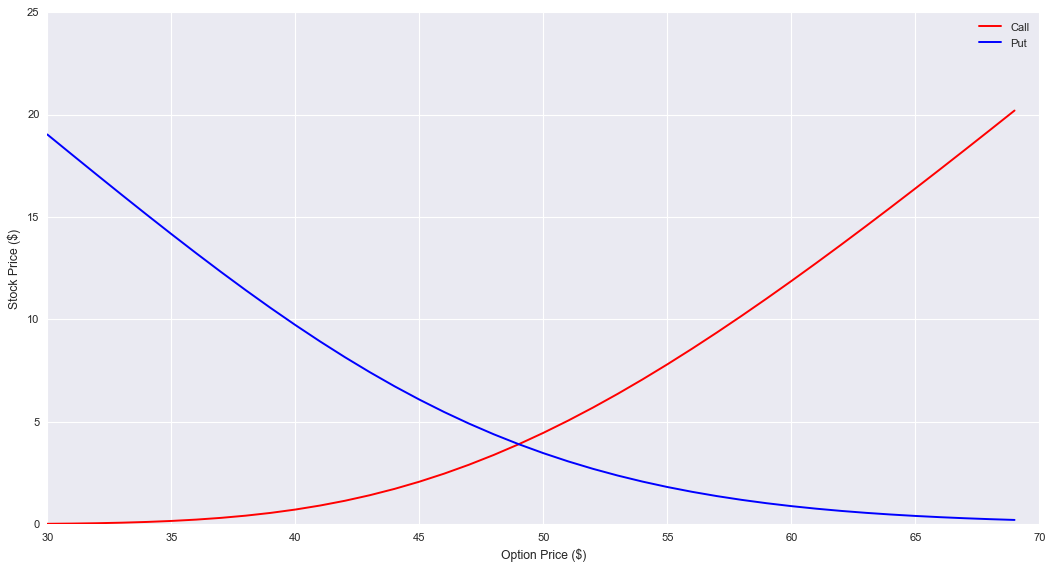

In [27]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
S = np.arange(30, 70)
vals_call = [BS_call(x, 50, 0.02, 0.2, 1, 0) for x in S]
vals_put = [BS_put(x, 50, 0.02, 0.2, 1, 0) for x in S]
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label  = "Put")
plt.legend();


In [28]:
vals = [30,50,85]
r = 0.02
vol = 0.2
T = 1
t = 0

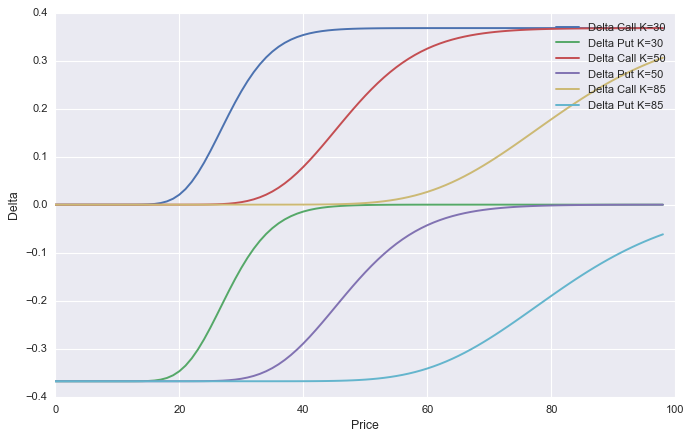

In [29]:

plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [delta(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [delta(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Delta Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Delta Put K=%i" % i ))

plt.ylabel("Delta")
plt.xlabel('Price')
plt.legend();

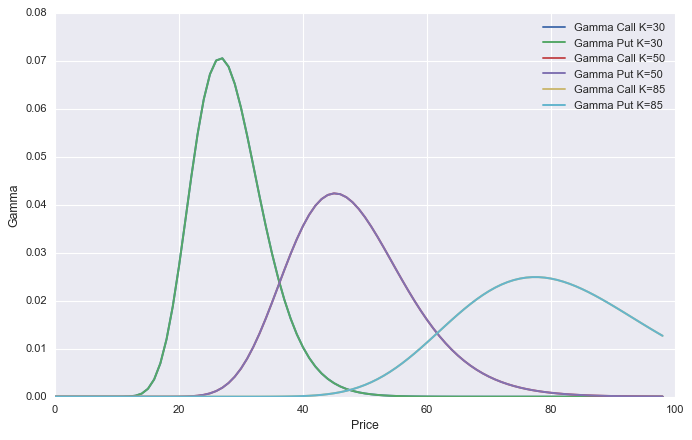

In [30]:
plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [gamma(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [gamma(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Gamma Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Gamma Put K=%i" % i ))

plt.ylabel("Gamma")
plt.xlabel('Price')
plt.legend();

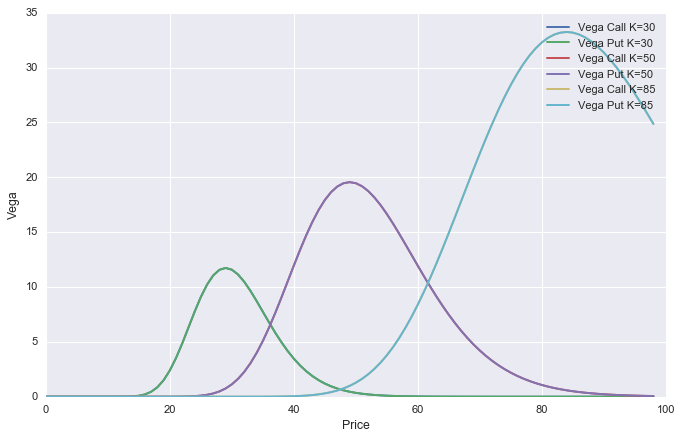

In [31]:
plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [vega(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [vega(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Vega Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Vega Put K=%i" % i ))

plt.ylabel("Vega")
plt.xlabel('Price')
plt.legend();

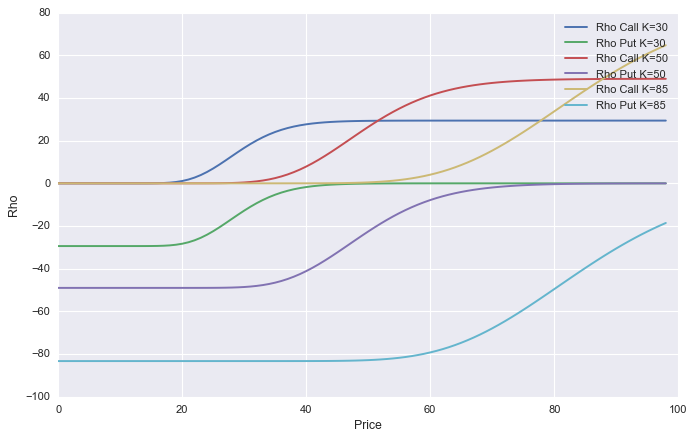

In [32]:
plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [rho(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [rho(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Rho Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Rho Put K=%i" % i ))

plt.ylabel("Rho")
plt.xlabel('Price')
plt.legend();

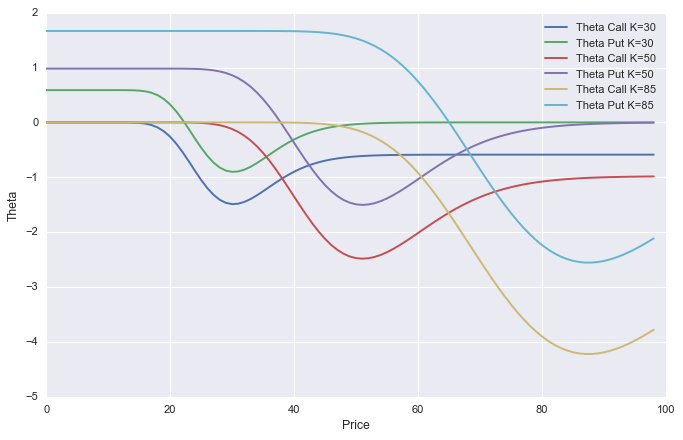

In [33]:
plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [theta(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [theta(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Theta Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Theta Put K=%i" % i ))

plt.ylabel("Theta")
plt.xlabel('Price')
plt.legend();

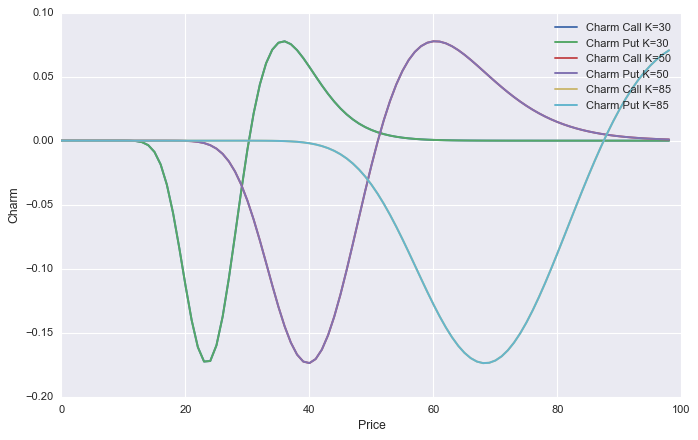

In [34]:
plt.figure(figsize=(10,6))
for i in vals:
    tmp_c = [charm(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [charm(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Charm Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Charm Put K=%i" % i ))

plt.ylabel("Charm")
plt.xlabel('Price')
plt.legend();

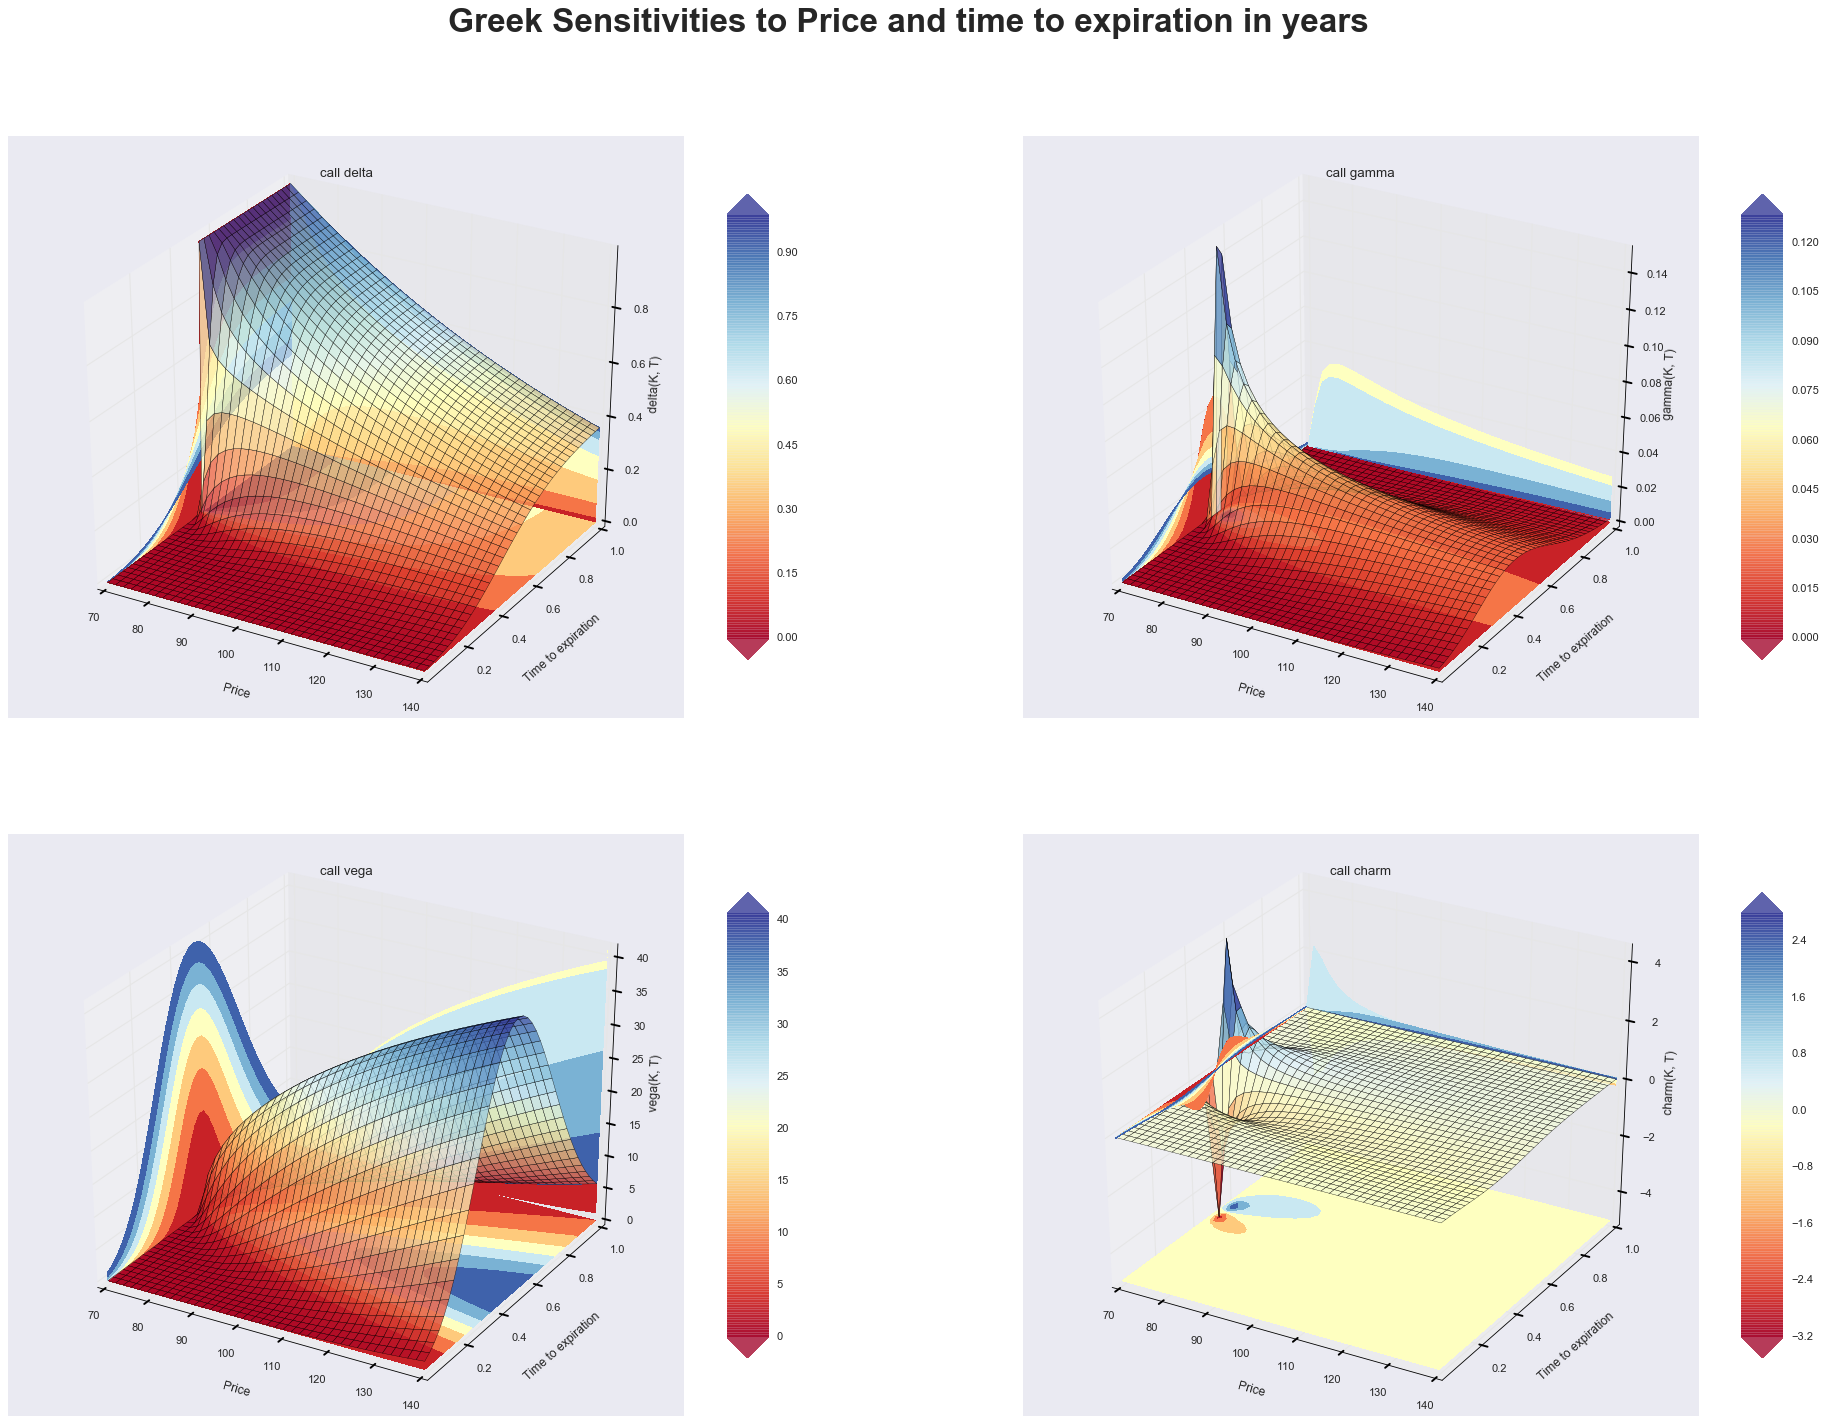

In [35]:
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# greek_function: input the function we want to calculate over 
# x_var_name: 1st variable we vary 
# y_var_name: 2nd variable we vary 
# S: vector of underlying prices 
# K: vector of strike prices 
# r: vector of risk free rates 
# vol: vector of volatilities 
# T: vector of expiry 
# t: vector of current date 
# x: meshgrid of 1st variable we vary 
# y: meshgrid of 2nd variable we vary 
# otype: put/call 
# plot: plot figure we want to write to 
def greeks_plot_tool(greek_function, x_var_name, y_var_name,S, K, r, vol, T, t, x, y, otype, plot):

# Initialise vector to store our option values and then iterate over
# Assumption that we're using a constant sized vector length for each variable     
# Need to change the variables being iterated over here for each update (possibly a better way to do this)     
    V = np.zeros((len(S), len(S)), dtype=np.float)
    for i in range(len(S)):
        for j in range(len(S)):
            V[i, j] = greek_function(S[i], K[i], r[i], vol[i], T[j], t[i], otype)
            
# Initiliase plotting canvas
    surf = plot.plot_surface(x, y, V, rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu)
    plot.set_xlabel('\n' + x_var_name, linespacing=4)
    plot.set_ylabel('\n' + y_var_name, linespacing=4)
    plot.set_zlabel("%s(K, T)" % greek_function.__name__)
    plot.set_title("%s %s" % (otype, greek_function.__name__))
    
    # Calculate colour levels based on our meshgrid     
    Vlevels = np.linspace(V.min(),V.max(),num=8,endpoint=True)
    xlevels = np.linspace(x.min(),x.max(),num=8,endpoint=True)
    ylevels = np.linspace(y.min(),y.max(),num=8,endpoint=True)
    
    cset = plot.contourf(x, y, V, Vlevels, zdir='z',offset=V.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, xlevels, zdir='x',offset=x.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, ylevels, zdir='y',offset=y.max(),
                       cmap=cm.RdYlBu,linestyles='dashed')

    # Set our viewing constraints     
    for c in cset.collections:
        c.set_dashes([(0, (2.0, 2.0))]) # Dash contours
    plt.clabel(cset,fontsize=10, inline=1)
    plot.set_xlim(x.min(),x.max())
    plot.set_ylim(y.min(),y.max())
    plot.set_zlim(V.min(),V.max())

    # Colorbar     
    colbar = plt.colorbar(surf, shrink=1.0, extend='both', aspect = 10)
    l,b,w,h = plt.gca().get_position().bounds
    ll,bb,ww,hh = colbar.ax.get_position().bounds
    colbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    
        
S = np.linspace(70, 140, 40)
K = np.linspace(105.0, 105.0, 40)
T = np.linspace(0.000001, 1.0, 40)
t = np.linspace(0.0, 0.0, 40)
r = np.linspace(0.02, 0.02, 40)
vol = np.linspace(0.15, 0.15, 40)

x, y  = np.meshgrid(S, T)

fig = plt.figure(figsize=(30,20))
fig.suptitle("Greek Sensitivities to Price and time to expiration in years",fontsize=30, fontweight='bold')
greeks = [delta, gamma, vega, charm]

for i in range(len(greeks)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    greeks_plot_tool(greeks[i],"Price", "Time to expiration", S, K, r, vol, T, t, x, y, "call", ax)

plt.show();

